In [1]:
# cnn models for image Classification
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

In [44]:
df = pd.read_csv('/pngs_fps15/files_edited.csv') # tags/labels for the image_set
#df = pd.read_csv('C:/dataset_01/GarageVideos/pngs_fps15/files_edited.csv') # tags/labels for the image_set # local file location

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4570 entries, 0 to 4569
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   filename        4570 non-null   object
 1   door_closed     4570 non-null   int64 
 2   door_full_open  4570 non-null   int64 
 3   door_moving     4570 non-null   int64 
 4   door_state      4570 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 178.6+ KB


In [5]:
df.head() # Door_state = door_closed = 1, door_full_open = 2, door_moving = 3, 

,filename,door_closed,door_full_open,door_moving,door_state
0,2019-03-24_13-45-07_LynxPro.mp4_001.png,0,1,0,2
1,2019-03-24_13-45-07_LynxPro.mp4_002.png,0,1,0,2
2,2019-03-24_13-45-07_LynxPro.mp4_003.png,0,1,0,2
3,2019-03-24_13-45-07_LynxPro.mp4_004.png,0,1,0,2
4,2019-03-24_13-45-07_LynxPro.mp4_005.png,0,1,0,2


In [45]:
files = df['filename'] # names of images file to load

In [46]:
x_siz = int(320/2) # scale down a little more
y_siz = int(180/2)

In [47]:
%%time
from sklearn.model_selection import train_test_split
import cv2

import numpy as np
import os

#os_dir = "C:/dataset_01/GarageVideos/pngs_fps15" # local file location
os_dir = "/pngs_fps15"
label = os.listdir(os_dir)
label = label[1:]
dataset = []

for image_label in files: # read in the image file from the dataframe
    img = cv2.imread(os_dir + "/" + image_label)
    img = cv2.resize(img, (x_siz, y_siz)) # make sure all are same size (and scaled down completely)
    blue, green, red = cv2.split(img) # split the grayscale images RGB channels
    img = blue # ditch the other channels
    dataset.append((img))
X = []

for input in dataset:
   X.append(input)

X = np.array(X)
y = df[['door_closed','door_full_open','door_moving']] # door states to classify
y = y.to_numpy()

CPU times: total: 4.55 s
Wall time: 5.12 s


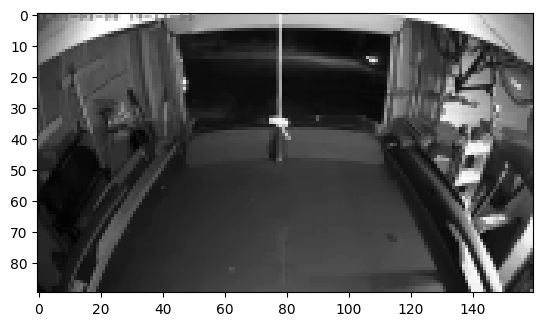

In [101]:
plt.imshow(X[3506], cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

Train: X=(4570, 90, 160), y=(4570, 3)
Test: X=(914, 160, 90, 1), y=(914, 3)


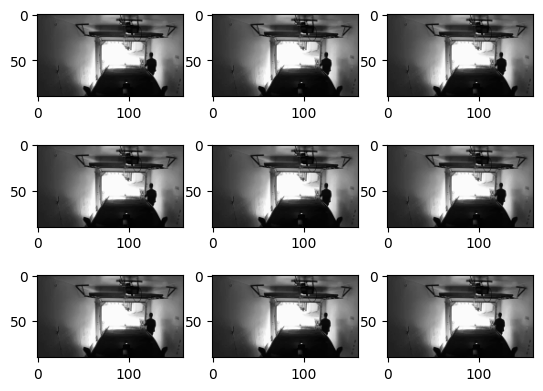

In [100]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X.shape, Y.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [26]:
def shape_dataset(trainX, testX):
 # reshape dataset to have a single channel
 trainX = trainX.reshape((trainX.shape[0], x_siz, y_siz, 1))
 testX = testX.reshape((testX.shape[0], x_siz, y_siz, 1))
 return trainX, testX

In [13]:
def prep_pixels(train, test): # convert pixels to floats and then normalize
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [14]:
# define cnn model (First version)
def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(y_siz, x_siz, 1))) #
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='softmax')) # wass 10

 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [15]:
# define cnn model(Improved Final Model)
def define_model_2():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(x_siz, y_siz, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(3, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

In [108]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, epoch, n_folds=5):
 scores, histories = list(), list()
 # prepare cross validation
 kfold = KFold(n_folds, shuffle=True, random_state=1)
 # enumerate splits
 for train_ix, test_ix in kfold.split(dataX):
     # define model
     model = define_model_2()
     # select rows for train and test
     trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
     # fit model
     history = model.fit(trainX, trainY, epochs=epoch, batch_size=32, validation_data=(testX, testY), verbose=0) #
     # evaluate model
     _, acc = model.evaluate(testX, testY, verbose=0)
     print('> %.3f' % (acc * 100.0))
     # stores scores
     scores.append(acc)
     histories.append(history)
 return scores, histories, model

In [109]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
 for i in range(len(histories)):
     # plot loss
     plt.subplot(2, 1, 1)
     plt.title('Cross Entropy Loss')
     plt.plot(histories[i].history['loss'], color='blue', label='train')
     plt.plot(histories[i].history['val_loss'], color='orange', label='test')
     # plot accuracy
     plt.subplot(2, 1, 2)
     plt.title('Classification Accuracy')
     plt.plot(histories[i].history['accuracy'], color='blue', label='train')
     plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
     plt.subplots_adjust(wspace=0.10, hspace=0.3)
     plt.show()

In [110]:
# summarize model performance
def summarize_performance(scores):
 # print summary
 print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
 # box and whisker plots of results
 plt.boxplot(scores)
 plt.title('Model Accuracy Performance')
 plt.ylabel("Accuracy")
 plt.show()

In [111]:
# run the test harness for evaluating a model
def run_test_harness(epoch):
 # load dataset
 trainX, testX = shape_dataset(X_train, X_test)
 trainY = y_train
 testY = y_test
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # evaluate model
 scores, histories, model = evaluate_model(trainX, y_train, epoch)
 # learning curves
 summarize_diagnostics(histories)
 # summarize estimated performance
 summarize_performance(scores)
 return model

> 99.317
> 99.453
> 100.000
> 99.453
> 99.726


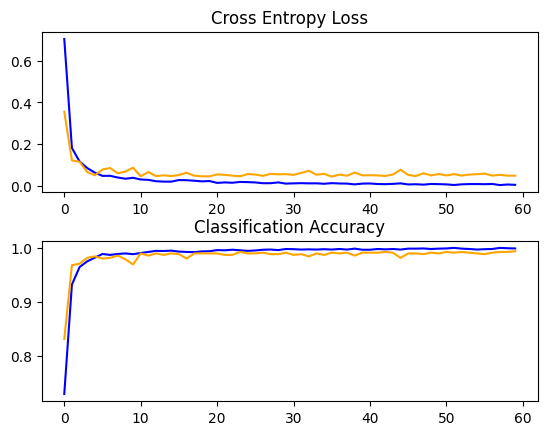

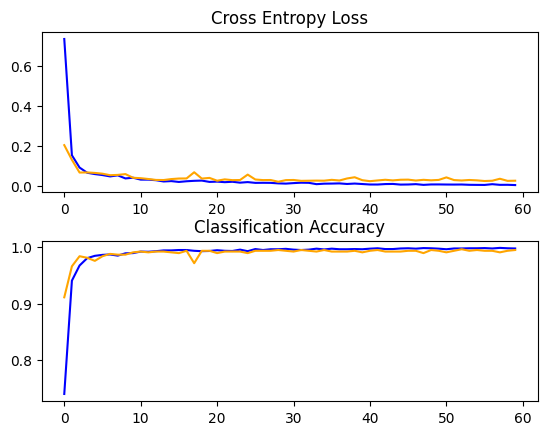

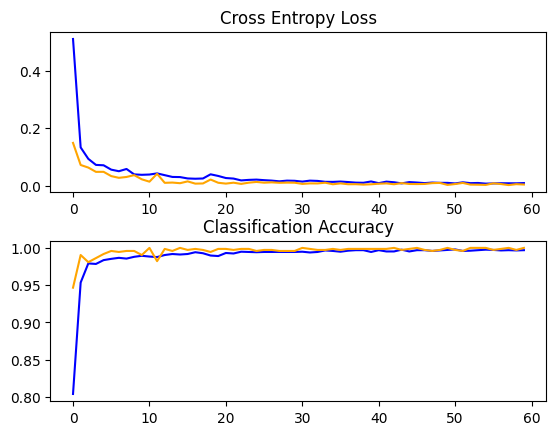

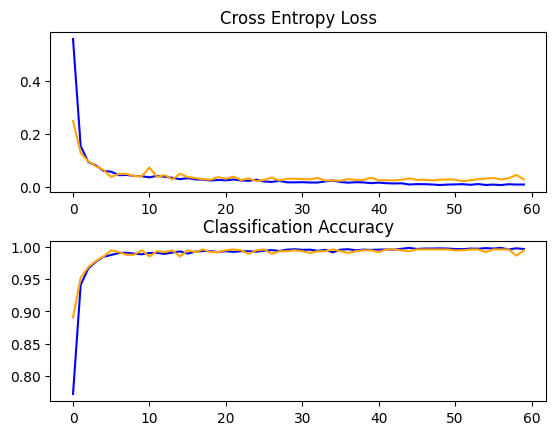

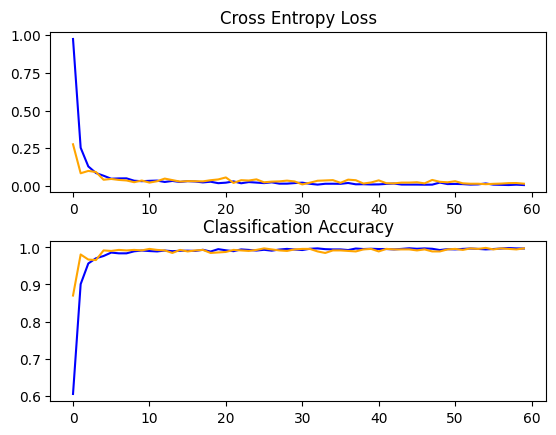

Accuracy: mean=99.590 std=0.245, n=5


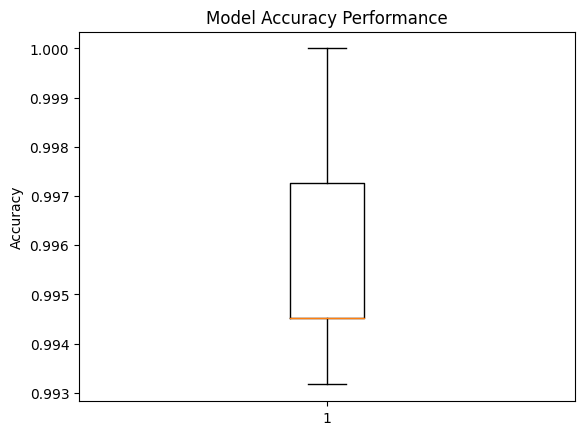

CPU times: total: 12min 43s
Wall time: 9min 24s


In [112]:
%%time
# entry point, run the test harness 60eps batch 32
run_test_harness(60)

> 99.317
> 99.179
> 99.863
> 99.453
> 99.453


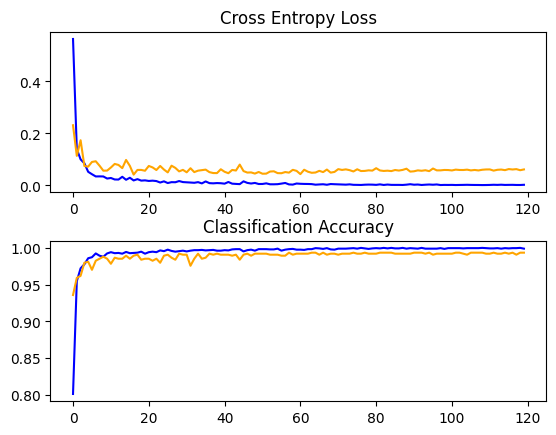

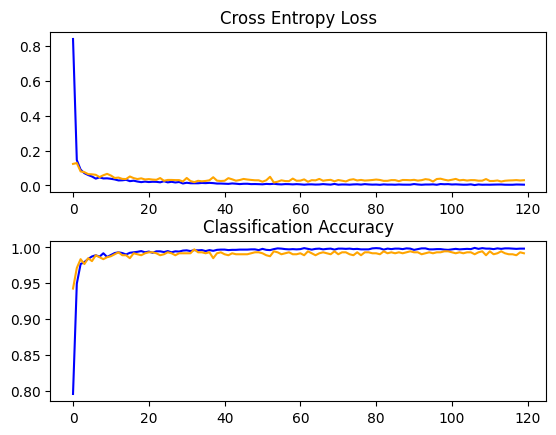

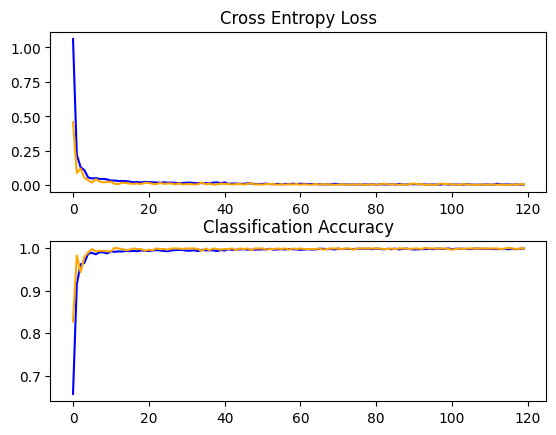

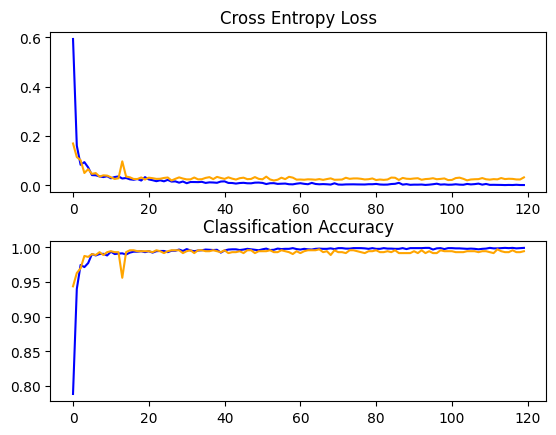

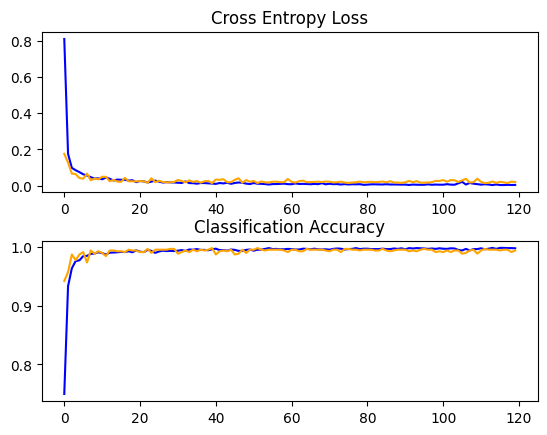

Accuracy: mean=99.453 std=0.229, n=5


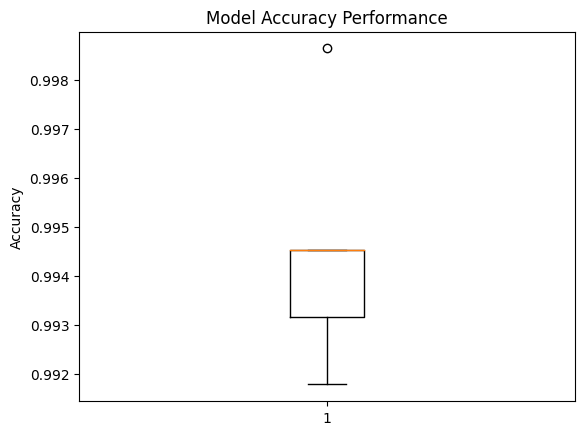

CPU times: total: 25min 2s
Wall time: 18min 32s


In [113]:
%%time
# entry point, run the test harness 120/32
run_test_harness(120)

> 99.317
> 99.316
> 99.863
> 99.316
> 99.590


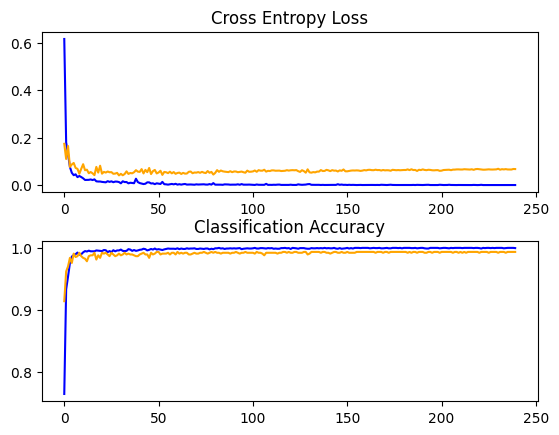

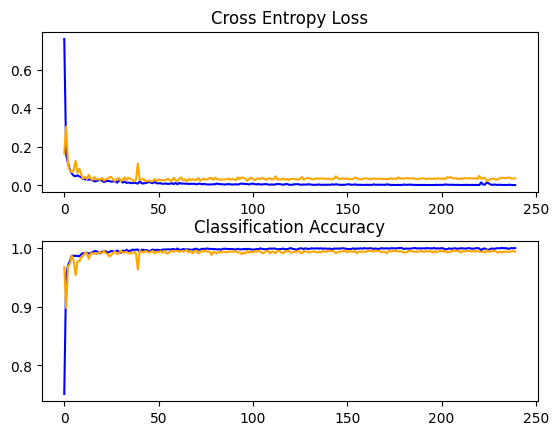

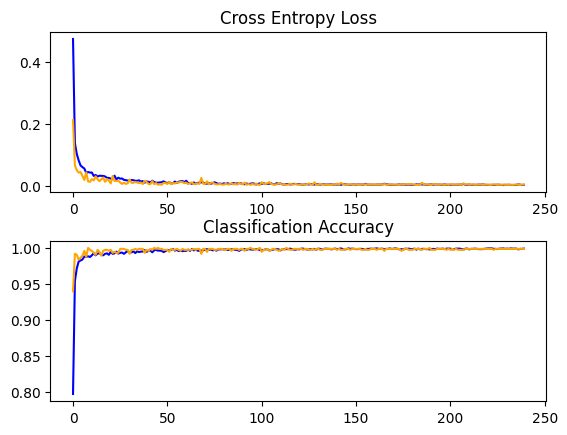

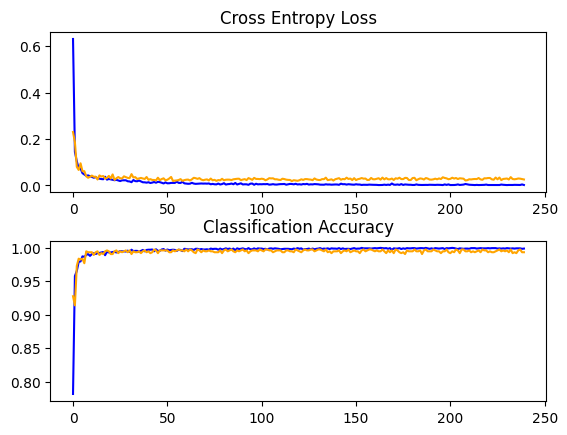

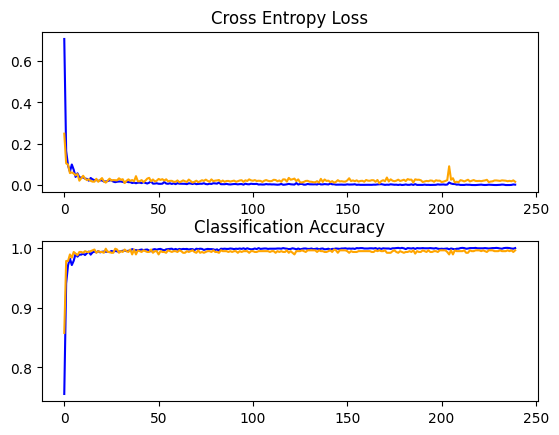

Accuracy: mean=99.480 std=0.219, n=5


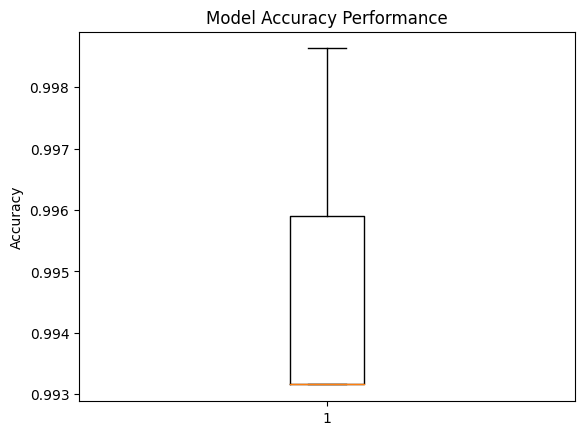

CPU times: total: 50min 45s
Wall time: 37min 23s


In [149]:
%%time
# entry point, run the test harness 240/32
run_test_harness(240)

> 98.907
> 99.316
> 99.863
> 99.453
> 99.042


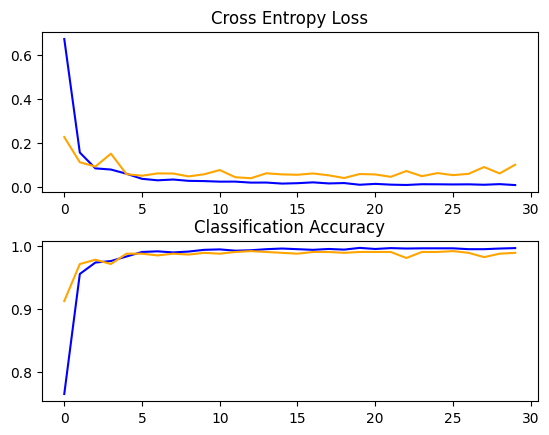

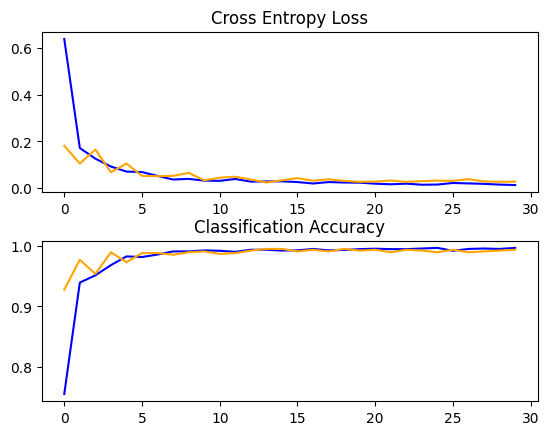

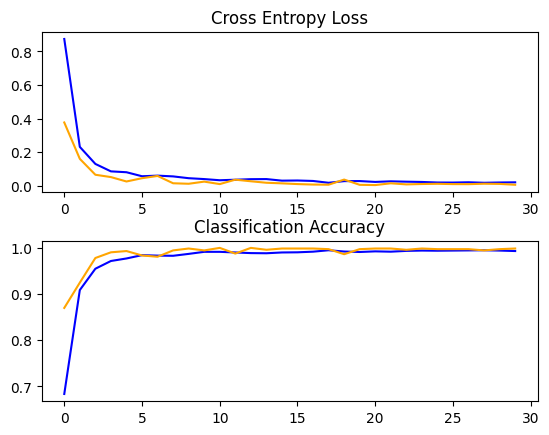

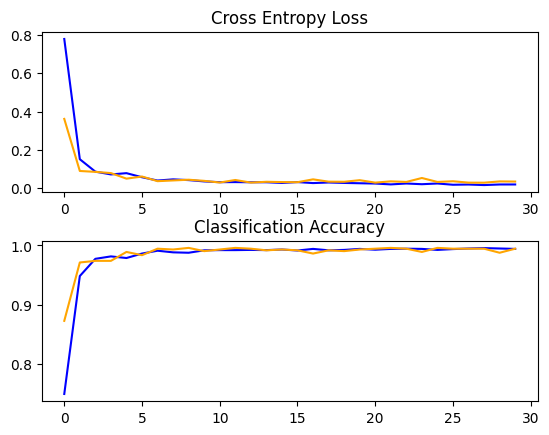

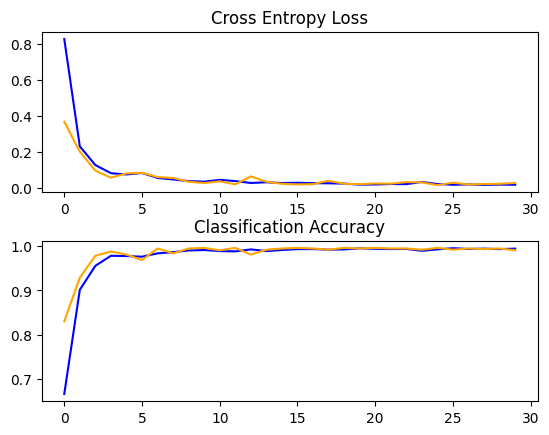

Accuracy: mean=99.316 std=0.335, n=5


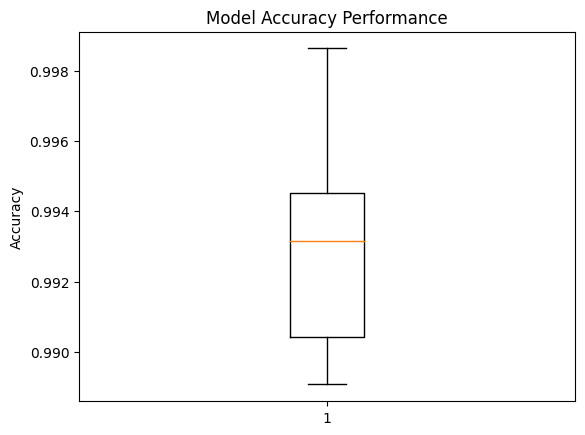

CPU times: total: 6min 13s
Wall time: 4min 41s


In [124]:
%%time
# entry point, run the test harness 30/32
run_test_harness(30)

In [115]:
# run the test harness for evaluating a model
def run_test_harness_and_save(epoch):
 # load dataset
 trainX, testX = shape_dataset(X_train, X_test)
 trainY = y_train
 testY = y_test
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # define model
 model = define_model_2() # use second improved model
 # fit model
 model.fit(trainX, trainY, epochs=epoch, batch_size=32, verbose=0) 
 # save model
 model.save('gdo_model.h5')
 return model

In [116]:
%%time
# entry point, run the test harness on the final model
gdo_model = run_test_harness_and_save(60)

CPU times: total: 2min 39s
Wall time: 2min 5s


29/29 [==============================] - 1s 17ms/step
[[[437   1]
  [  0 476]]

 [[739   3]
  [  0 172]]

 [[648   0]
  [  5 261]]]


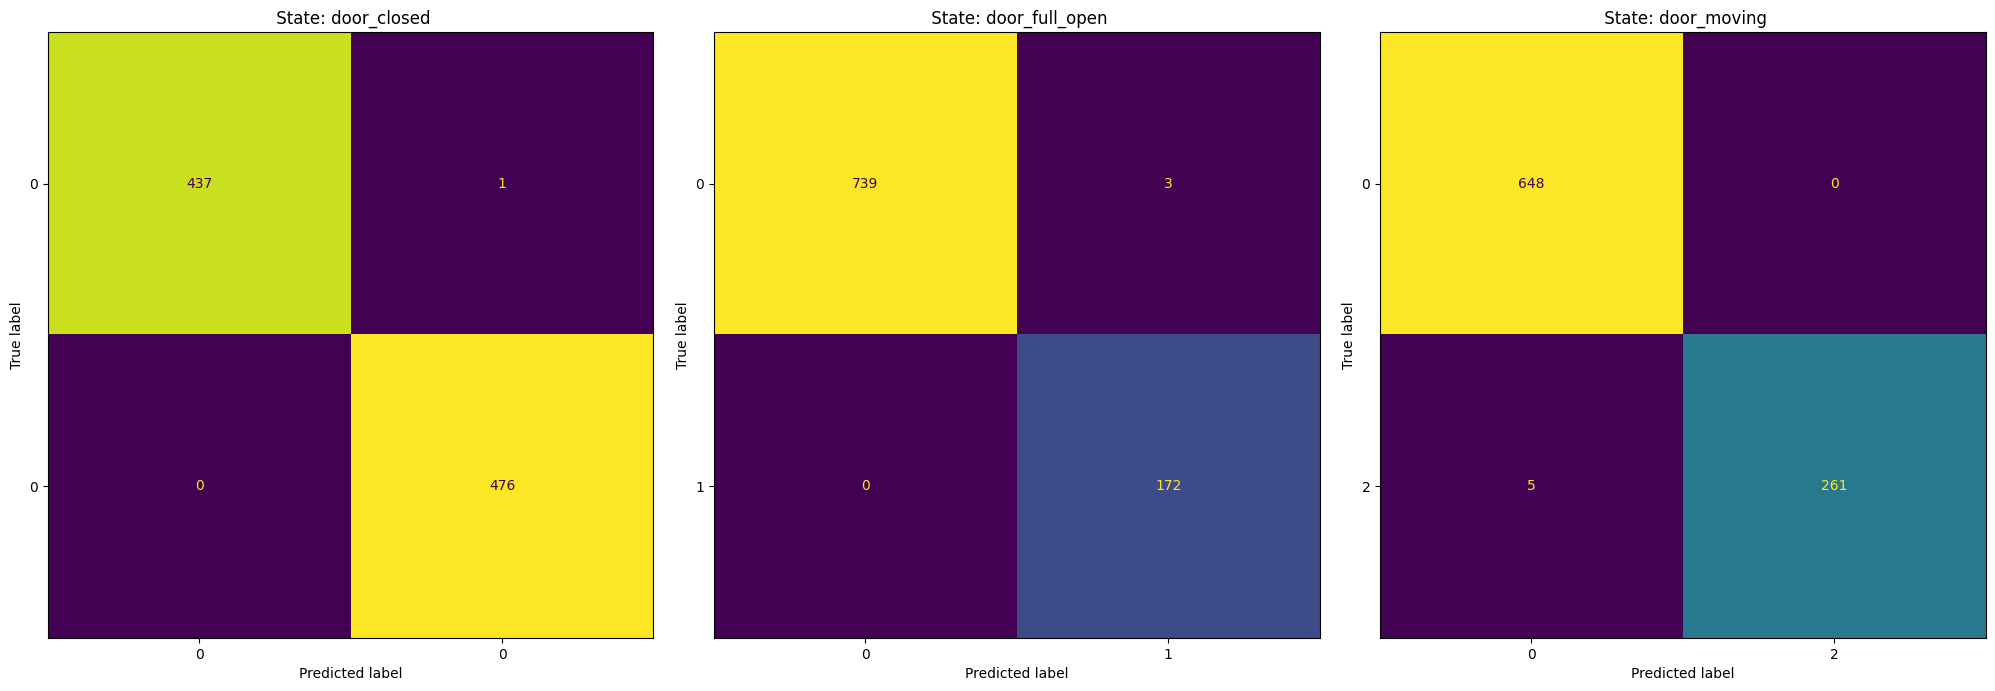

In [148]:
# Use the model to predict the values from the test_images.
y_pred=""
testX = X_test.reshape((X_test.shape[0], x_siz, y_siz, 1))
y_pred = gdo_model.predict(testX) # test_images
y_pred = np.asarray(y_pred, dtype = 'int')

# Calculate the confusion matrix using sklearn.metrics
cm = multilabel_confusion_matrix(y_test, y_pred) #, labels=test_labels)
print (cm)

test_labels = ['door_closed','door_full_open','door_moving'] # door states to classify
# Display confusion maxtrixes
f, axes = plt.subplots(1, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(3):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test[:, i],
                                                   y_pred[:, i]),
                                                   display_labels=[0, i])
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f' State: {test_labels[i]}')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.3)
#f.colorbar(disp.im_, ax=axes) # add a color bar
plt.show()

In [48]:
# Use model to make a prediction for a unseen images
from numpy import argmax
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

# load and prep the image
def load_prep_image(filename):
 img = cv2.imread(filename) # load the image
 img = cv2.resize(img, (x_siz, y_siz)) # make sure all are same size (and scaled down completely)
 blue, green, red = cv2.split(img) # split the grayscale images RGB channels
 img = blue # ditch the other channels   
 img = img_to_array(img) # convert to array
 img = img.reshape(1, x_siz, y_siz, 1) # reshape into a single sample with single channel
 # prep pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img, blue
 
# load/prep an image and then predict the doorstate
def run_validate(filename):
 # load the image from validation set
 img, im4_plt = load_prep_image(filename)
 result_labels = ['Door Closed','Door Full Open','Door Moving'] # door states
 # load model
 plt.imshow(im4_plt, cmap=plt.get_cmap('gray')) # display the image
 plt.show()
 model = load_model('gdo_model.h5')
 # predict the class
 predict_value = model.predict(img)
 door_state = argmax(predict_value)
 print(result_labels[door_state])
 print(predict_value)


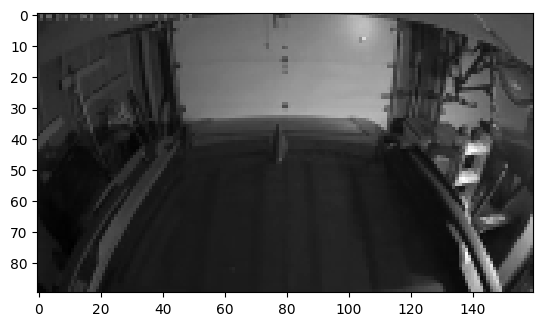

1/1 [==============================] - 0s 63ms/step
Door Closed
[[9.9999571e-01 4.1839034e-09 4.3386030e-06]]


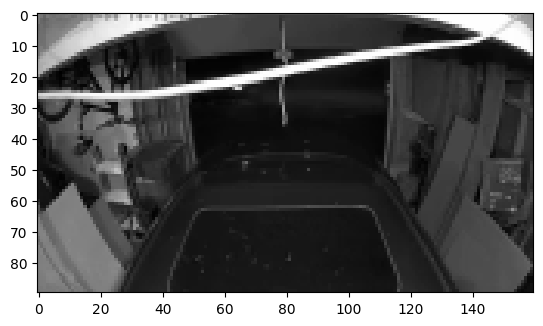

1/1 [==============================] - 0s 62ms/step
Door Full Open
[[4.800455e-06 9.996449e-01 3.503364e-04]]


In [49]:
# run Valadation on two unseen images
#run_validate('C:/dataset_01/GarageVideos/validate/2023-02-08_19-12-54_GarageKatieSide.mp4_115.png') # expect door closed #local paths
#run_validate('C:/dataset_01/GarageVideos/validate/2023-02-08_19-12-35_NathanGDOCam.mp4_52.png') # expect door full open
run_validate('/validate/2023-02-08_19-12-54_GarageKatieSide.mp4_115.png') # expect door closed
run_validate('/validate/2023-02-08_19-12-35_NathanGDOCam.mp4_52.png') # expect door full open